# 1. Mount GD and Set The Path






In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ROOT = "/content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/Dataset"
IMG_PATH = ROOT + "//" + "Dataset//Images"
ATTR_PATH = ROOT + "//" + "list_attr_celeba.csv"
seed = 46

# 2. Setting Environment

In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 3. Data Cleaning

In [ ]:
attr_df = pd.read_csv(ATTR_PATH)
attr_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
attr_df.index

RangeIndex(start=0, stop=202599, step=1)

In [ ]:
male_df = attr_df.loc[:, ["image_id", "Male"]]
male_df.head()

,image_id,Male
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
male_df.replace(-1, 0, inplace=True)

In [ ]:
male_df.head()

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
male_df.describe()

,Male
count,202599.000000
mean,0.416754
std,0.493023
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
image_files = set(os.listdir(IMG_PATH))
filtered_Male_df = male_df[male_df['image_id'].isin(image_files)]

In [ ]:
filtered_Male_df.head()

,image_id,Male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,0


In [ ]:
print("Filtered image :", filtered_Male_df['Male'].count())

Filtered image : 5000


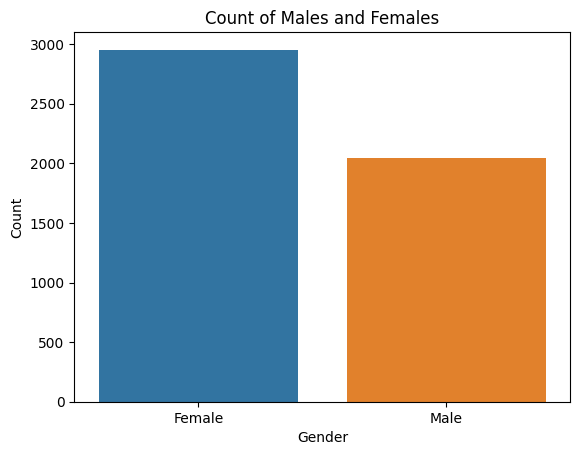

In [ ]:
# Create a new DataFrame to group data by gender and get the count
gender_count = filtered_Male_df.groupby('Male')['image_id'].count().reset_index(name='count')

# Create the bar graph
sns.barplot(x = 'Male', y = 'count', data=gender_count)

# Replace the numerical values 0 and 1 with 'Female' and 'Male' in the x-axis labels
plt.xticks([0, 1], ['Female', 'Male'])

# Add a title and labels
plt.title('Count of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the graph
plt.show()

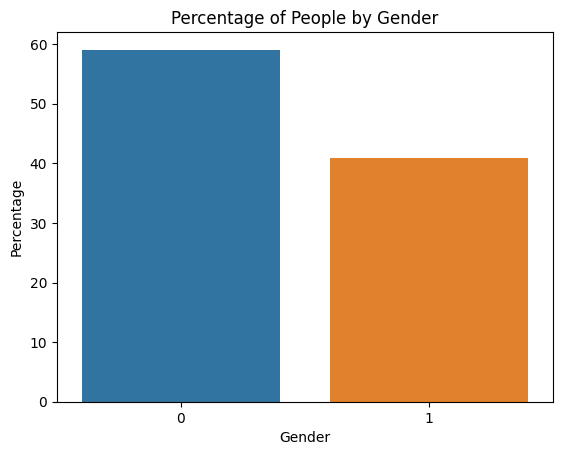

In [ ]:
# Count the number of people of each gender
gender_count = filtered_Male_df['Male'].value_counts()

# Calculate the percentage of people of each gender
gender_percentages = (gender_count / filtered_Male_df['Male'].count()) * 100

# Create a bar chart to visualize the percentages
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)

# Add a title and labels to the chart
plt.title('Percentage of People by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Show the chart
plt.show()

In [ ]:
# Create a dictionary to store the counts and percentages
gender_counts = {}

# Count the number of females and males
female_count = len(filtered_Male_df[filtered_Male_df['Male'] == 0])
male_count = len(filtered_Male_df[filtered_Male_df['Male'] == 1])

# Calculate the percentage of females and males
female_percentage = (female_count / len(filtered_Male_df)) * 100
male_percentage = (male_count / len(filtered_Male_df)) * 100

# Store the counts and percentages in the dictionary
gender_counts['Female'] = {'count': female_count, 'percentage': female_percentage}
gender_counts['Male'] = {'count': male_count, 'percentage': male_percentage}

# Print the gender counts and percentages
for gender in gender_counts:
    print(f"{gender}:")
    print(f"Count: {gender_counts[gender]['count']}")
    print(f"Percentage: {gender_counts[gender]['percentage']:.2f}%")

Female:
Count: 2953
Percentage: 59.06%
Male:
Count: 2047
Percentage: 40.94%


# 3. Data Loading and Balancing

In [ ]:
IMG_EXAM_1 = IMG_PATH + "//" + "000065.jpg"
IMG_EXAM_2 = IMG_PATH + "//" + "000065.jpg"

In [ ]:
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img(IMG_EXAM_1)
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(178, 218)


In [ ]:
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img, img_to_array, array_to_img
# load the image
img = load_img(IMG_EXAM_2)
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(178, 218)


In [ ]:
image = tf.keras.utils.load_img(IMG_EXAM_1)
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr.shape

(1, 218, 178, 3)

In [ ]:
from sklearn.model_selection import train_test_split

data = filtered_Male_df.copy(deep=True)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=seed)

In [ ]:
train_data['Male'] = train_data['Male'].astype(str)
test_data['Male'] = test_data['Male'].astype(str)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
image_size = (218, 178)
batch_size = 32

# Create a data generator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation options (adjust as needed)
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=IMG_PATH,
    x_col='image_id',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=seed,
    shuffle=True  # Shuffle the training data
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=IMG_PATH,
    x_col='image_id',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=seed
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=IMG_PATH,
    x_col='image_id',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Don't shuffle the test data
)

Found 3200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


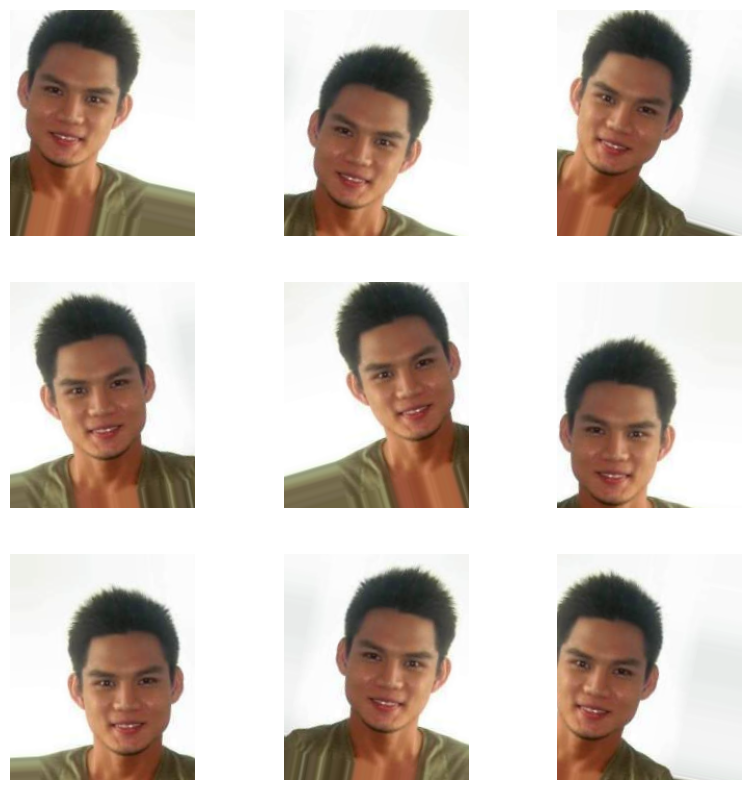

In [ ]:
# Load an example image
img = load_img(IMG_EXAM_2)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create a 3x3 grid for augmented images
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    batch = next(datagen.flow(x, batch_size=1))
    imgplot = plt.imshow(array_to_img(batch[0]))
    ax.axis('off')

plt.show()

In [ ]:
print(f"train -> 0 : {train_generator.classes.count(0)}")
print(f"train -> 1 : {train_generator.classes.count(1)}")

train -> 0 : 1920
train -> 1 : 1280


In [ ]:
print(f"validation -> 0 : {validation_generator.classes.count(0)}")
print(f"validation -> 1 : {validation_generator.classes.count(1)}")

validation -> 0 : 453
validation -> 1 : 347


In [ ]:
print(f"test -> 0 : {test_generator.classes.count(0)}")
print(f"test -> 1 : {test_generator.classes.count(1)}")

test -> 0 : 580
test -> 1 : 420


# 5. [Disclaimer] Model example

## 5.1 Model Builder Function

In [ ]:
num_epoch = 25

In [ ]:
import os

# Define the root directory
save_path = "/content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver"

In [ ]:
# # Model Builder
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, models
# from tensorflow.keras.optimizers import Adam

# def model_builder(base_model):
#   # Create a custom top model for binary classification
#   model = models.Sequential()
#   model.add(base_model)
#   model.add(layers.Flatten())
#   model.add(layers.Dense(256, activation='relu'))
#   model.add(layers.Dropout(0.5))
#   model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

#   return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def model_builder(base_model, model_name, trainable):
    # Create a custom top model for binary classification
    file_path = os.path.join(save_path, f'{model_name}.h5')  # Generate the file path based on the model name

    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                           monitor='val_accuracy',
                                           verbose=1,
                                           save_freq='epoch',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='max'),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=7,
            restore_best_weights=True
        ),
    ]

    # Make trainable or not
    for layer in base_model:
      layer.trainable = trainable

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    return model, callbacks

In [ ]:
# file_path = f'gender_resnet50.h5'

# call_back = [
#     tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
#                                         monitor='val_accuracy',
#                                         verbose=1,
#                                         save_freq='epoch',
#                                         save_best_only=True,
#                                         save_weights_only=False,
#                                         mode='max'),
#     tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss',
#         patience=10,
#         restore_best_weights=True
#     ),
# ]

## 5.2 Class Weight (For Imbalance data)

## 5.3 Fine Tuning

In [ ]:
######## CLASS WEIGHT ##########
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(train_generator.classes)
class_weights = compute_class_weight(class_weight = 'balanced', classes=classes, y=train_generator.classes)
class_weights = dict(enumerate(class_weights))
######################################

In [ ]:
print(class_weights)

{0: 0.8333333333333334, 1: 1.25}


### A. VGG19

In [ ]:
from keras.src import callbacks
from tensorflow.keras.applications import VGG19

# Load the VGG19 pre-trained model (excluding top layers)
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
# base_model_vgg19.trainable = True
vgg19_ft, callback = model_builder(base_model_vgg19, 'vgg19_ft_v2', True)

# Compile the model
vgg19_ft.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history1 = vgg19_ft.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.7394
Epoch 1: val_accuracy improved from -inf to 0.90375, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg19_ft.h5
100/100 [==============================] - 82s 761ms/step - loss: 0.5143 - accuracy: 0.7394 - val_loss: 0.2386 - val_accuracy: 0.9038
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.9038
Epoch 2: val_accuracy improved from 0.90375 to 0.91125, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg19_ft.h5
100/100 [==============================] - 75s 754ms/step - loss: 0.2327 - accuracy: 0.9038 - val_loss: 0.2115 - val_accuracy: 0.9112
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9369
Epoch 3: val_accuracy improved from 0.91125 to 0.95875, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 -

### B. ResNet101

In [ ]:
from tensorflow.keras.applications import ResNet101

# Load the ResNet-101 pre-trained model (excluding top layers)
base_model_resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
# base_model_resnet101.trainable = True
resnet101_ft, callback = model_builder(base_model_resnet101, 'resnet101_ft_v2', True)

# Compile the model
resnet101_ft.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history2 = resnet101_ft.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    class_weight=class_weights,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.8781
Epoch 1: val_accuracy improved from -inf to 0.43375, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/resnet101_ft.h5
100/100 [==============================] - 148s 879ms/step - loss: 0.4313 - accuracy: 0.8781 - val_loss: 0.8087 - val_accuracy: 0.4338
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9413
Epoch 2: val_accuracy did not improve from 0.43375
100/100 [==============================] - 65s 642ms/step - loss: 0.1476 - accuracy: 0.9413 - val_loss: 1.1051 - val_accuracy: 0.4338
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9578
Epoch 3: val_accuracy improved from 0.43375 to 0.43500, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/resnet101_ft.h5
100/100 [==============================] - 127s 1s/step - l

### C. VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 pre-trained model (excluding top layers)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
base_model_vgg16.trainable = True
vgg16_ft, callback = model_builder(base_model_vgg16, 'vgg16_ft')

# Compile the model
vgg16_ft.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Train the model
history3 = vgg16_ft.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    validation_data=validation_generator
)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.6803
Epoch 1: val_accuracy improved from -inf to 0.91250, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg16_ft.h5
100/100 [==============================] - 63s 589ms/step - loss: 0.5797 - accuracy: 0.6803 - val_loss: 0.2432 - val_accuracy: 0.9125
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.2451 - accuracy: 0.8994
Epoch 2: val_accuracy improved from 0.91250 to 0.92250, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg16_ft.h5
100/100 [==============================] - 62s 624ms/step - loss: 0.2451 - accuracy: 0.8994 - val_loss: 0.1773 - val_accuracy: 0.9225
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.1694 - accuracy: 0.9353
Epoch 3: val_accuracy improved from 0.92250 to 0.95250, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 -

### D. ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the ResNet-50 pre-trained model (excluding top layers)
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
base_model_resnet50.trainable = True
resnet50_ft, callback = model_builder(base_model_resnet50, 'resnet50_ft')

# Compile the model
resnet50_ft.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:

# Train the model
history4 = resnet50_ft.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    class_weight=class_weights,
    validation_data=validation_generator
)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.8722
Epoch 1: val_accuracy improved from -inf to 0.43375, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/resnet50_ft.h5
100/100 [==============================] - 94s 639ms/step - loss: 0.4510 - accuracy: 0.8722 - val_loss: 0.9842 - val_accuracy: 0.4338
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.1400 - accuracy: 0.9450
Epoch 2: val_accuracy did not improve from 0.43375
100/100 [==============================] - 59s 592ms/step - loss: 0.1400 - accuracy: 0.9450 - val_loss: 0.8711 - val_accuracy: 0.4338
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 0.9553
Epoch 3: val_accuracy did not improve from 0.43375
100/100 [==============================] - 58s 574ms/step - loss: 0.1168 - accuracy: 0.9553 - val_loss: 1.8147 - val_accuracy: 0.4338
Epoch 4/25
100/100 [========================

### E. GoogleNet

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import Adam

# # Load the InceptionV1 model from TensorFlow Hub with ImageNet weights
# hub_model_url = "https://tfhub.dev/google/imagenet/inception_v1/classification/4"
# base_model_googleNet = hub.KerasLayer(hub_model_url, trainable=True)

# # Create a custom top model for binary classification
# model_googleNet = tf.keras.Sequential([
#     base_model_googleNet,
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Output layer for binary classification
# ])

# # Compile the model
# model_googleNet.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# # Train the model
# history5 = model_googleNet.fit(train_generator, epochs=10, class_weight=class_weights, validation_data=validation_generator)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Layer, Flatten, Dense, Dropout

class CustomInceptionV1LayerFT(Layer):
    def __init__(self, hub_model_url, trainable=True, **kwargs):
        super(CustomInceptionV1LayerFT, self).__init__(**kwargs)
        self.base_model = hub.KerasLayer(hub_model_url, trainable=trainable)

    def call(self, inputs):
        return self.base_model(inputs)

# Load the InceptionV1 model from TensorFlow Hub with ImageNet weights
hub_model_url = "https://tfhub.dev/google/imagenet/inception_v1/classification/4"

# Create a custom top model for binary classification
googlenet_ft = tf.keras.Sequential([
    CustomInceptionV1LayerFT(hub_model_url, input_shape=(218, 178, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Compile the model
googlenet_ft.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
file_path = os.path.join(save_path, f'googlenet_ft.h5')  # Generate the file path based on the model name

callback = [
    tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_freq='epoch',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        mode='max'),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
]

In [ ]:
# Train the model
history5 = googlenet_ft.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    class_weight=class_weights,
    validation_data=validation_generator
)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.5900 - accuracy: 0.8600
Epoch 1: val_accuracy improved from -inf to 0.92625, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/googlenet_ft.h5
100/100 [==============================] - 79s 515ms/step - loss: 0.5900 - accuracy: 0.8600 - val_loss: 0.4314 - val_accuracy: 0.9262
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.9322
Epoch 2: val_accuracy improved from 0.92625 to 0.95125, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/googlenet_ft.h5
100/100 [==============================] - 51s 513ms/step - loss: 0.4122 - accuracy: 0.9322 - val_loss: 0.3670 - val_accuracy: 0.9513
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.9438
Epoch 3: val_accuracy improved from 0.95125 to 0.96000, saving model to /content/gdrive/MyDrive/IndonesiaAI/Pro

## 5.3 Transfer Learning

### A. VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

# Load the VGG19 pre-trained model (excluding top layers)
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
base_model_vgg19.trainable = False

vgg19_tl, callback = model_builder(base_model_vgg19, 'vgg19_tl')

# Compile the model
vgg19_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
vgg19_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history6 = vgg19_tl.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.4823 - accuracy: 0.7594
Epoch 1: val_accuracy improved from -inf to 0.80125, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg19_tl.h5
100/100 [==============================] - 54s 520ms/step - loss: 0.4823 - accuracy: 0.7594 - val_loss: 0.4072 - val_accuracy: 0.8012
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8481
Epoch 2: val_accuracy improved from 0.80125 to 0.85625, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg19_tl.h5
100/100 [==============================] - 56s 561ms/step - loss: 0.3526 - accuracy: 0.8481 - val_loss: 0.3363 - val_accuracy: 0.8562
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.3389 - accuracy: 0.8587
Epoch 3: val_accuracy improved from 0.85625 to 0.87375, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 -

### B. ResNet101

In [ ]:
from tensorflow.keras.applications import ResNet101

# Load the ResNet-101 pre-trained model (excluding top layers)
base_model_resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
base_model_resnet101.trainable = False
resnet101_tl, callback = model_builder(base_model_resnet101, 'ResNet101_tl')

# Compile the model
resnet101_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
resnet101_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history7 = resnet101_tl.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    class_weight=class_weights,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.5169
Epoch 1: val_accuracy improved from -inf to 0.43375, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/ResNet101_tl.h5
100/100 [==============================] - 87s 794ms/step - loss: 0.8067 - accuracy: 0.5169 - val_loss: 0.7158 - val_accuracy: 0.4338
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5028
Epoch 2: val_accuracy improved from 0.43375 to 0.62750, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/ResNet101_tl.h5
100/100 [==============================] - 69s 694ms/step - loss: 0.6936 - accuracy: 0.5028 - val_loss: 0.6863 - val_accuracy: 0.6275
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.5053
Epoch 3: val_accuracy did not improve from 0.62750
100/100 [==============================] - 56s 562ms/step - 

### C. VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 pre-trained model (excluding top layers)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
base_model_vgg16.trainable = False
vgg16_tl, callback = model_builder(base_model_vgg16, 'vgg16_tl')

# Compile the model
vgg16_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
vgg16_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history8 = vgg16_tl.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.4405 - accuracy: 0.7862
Epoch 1: val_accuracy improved from -inf to 0.85750, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg16_tl.h5
100/100 [==============================] - 52s 497ms/step - loss: 0.4405 - accuracy: 0.7862 - val_loss: 0.3475 - val_accuracy: 0.8575
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8469
Epoch 2: val_accuracy improved from 0.85750 to 0.86125, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/vgg16_tl.h5
100/100 [==============================] - 54s 538ms/step - loss: 0.3420 - accuracy: 0.8469 - val_loss: 0.3201 - val_accuracy: 0.8612
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.3155 - accuracy: 0.8650
Epoch 3: val_accuracy improved from 0.86125 to 0.88375, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 -

### D. Resnet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the ResNet-50 pre-trained model (excluding top layers)
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(218, 178, 3))
base_model_resnet50.trainable = False
resnet50_tl, callback = model_builder(base_model_resnet50, 'ResNet50_tl')

# Compile the model
resnet50_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
resnet50_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history9 = resnet50_tl.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    class_weight=class_weights,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.8505 - accuracy: 0.5109
Epoch 1: val_accuracy improved from -inf to 0.59500, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/ResNet50_tl.h5
100/100 [==============================] - 61s 575ms/step - loss: 0.8505 - accuracy: 0.5109 - val_loss: 0.6856 - val_accuracy: 0.5950
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.5319
Epoch 2: val_accuracy did not improve from 0.59500
100/100 [==============================] - 50s 503ms/step - loss: 0.6888 - accuracy: 0.5319 - val_loss: 0.6961 - val_accuracy: 0.4363
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5594
Epoch 3: val_accuracy improved from 0.59500 to 0.60125, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/ResNet50_tl.h5
100/100 [==============================] - 61s 607ms/step - lo

###E. GoogleNet

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Layer, Flatten, Dense, Dropout

class CustomInceptionV1LayerTL(Layer):
    def __init__(self, hub_model_url, trainable=False, **kwargs):
        super(CustomInceptionV1LayerTL, self).__init__(**kwargs)
        self.base_model = hub.KerasLayer(hub_model_url, trainable=trainable)

    def call(self, inputs):
        return self.base_model(inputs)

# Load the InceptionV1 model from TensorFlow Hub with ImageNet weights
hub_model_url = "https://tfhub.dev/google/imagenet/inception_v1/classification/4"

# Create a custom top model for binary classification
googlenet_tl = tf.keras.Sequential([
    CustomInceptionV1LayerTL(hub_model_url, input_shape=(218, 178, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
file_path = os.path.join(save_path, f'googlenet_tl.h5')  # Generate the file path based on the model name

callback = [
    tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_freq='epoch',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        mode='max'),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
]

In [ ]:
googlenet_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history10 = googlenet_tl.fit(
    train_generator,
    epochs=num_epoch,
    callbacks=callback,
    class_weight=class_weights,
    validation_data=validation_generator
    )

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 0.5236 - accuracy: 0.7806
Epoch 1: val_accuracy improved from -inf to 0.89000, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/googlenet_tl.h5
100/100 [==============================] - 53s 496ms/step - loss: 0.5236 - accuracy: 0.7806 - val_loss: 0.2692 - val_accuracy: 0.8900
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 0.3603 - accuracy: 0.8559
Epoch 2: val_accuracy improved from 0.89000 to 0.90000, saving model to /content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver/googlenet_tl.h5
100/100 [==============================] - 49s 495ms/step - loss: 0.3603 - accuracy: 0.8559 - val_loss: 0.2499 - val_accuracy: 0.9000
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 0.3070 - accuracy: 0.8759
Epoch 3: val_accuracy did not improve from 0.90000
100/100 [==============================] - 47s 475ms/step - 

# 6. Plot the Training

In [ ]:
# Define a function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

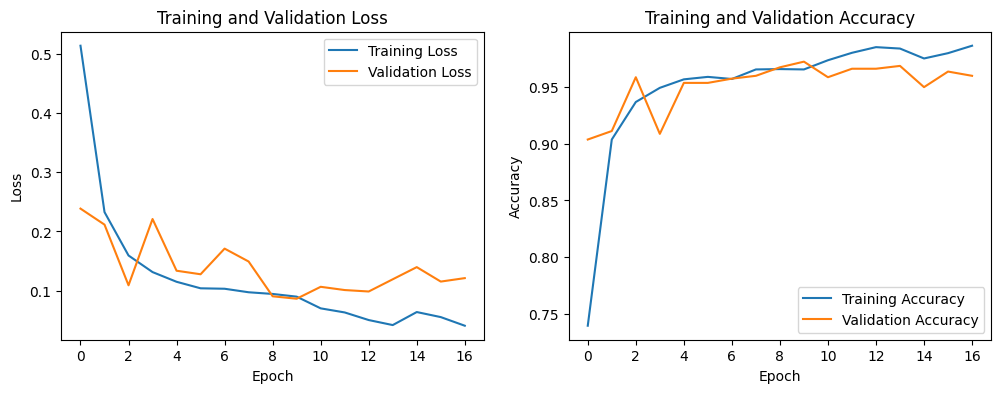

In [ ]:
# VGG19_ft
plot_training_history(history1)

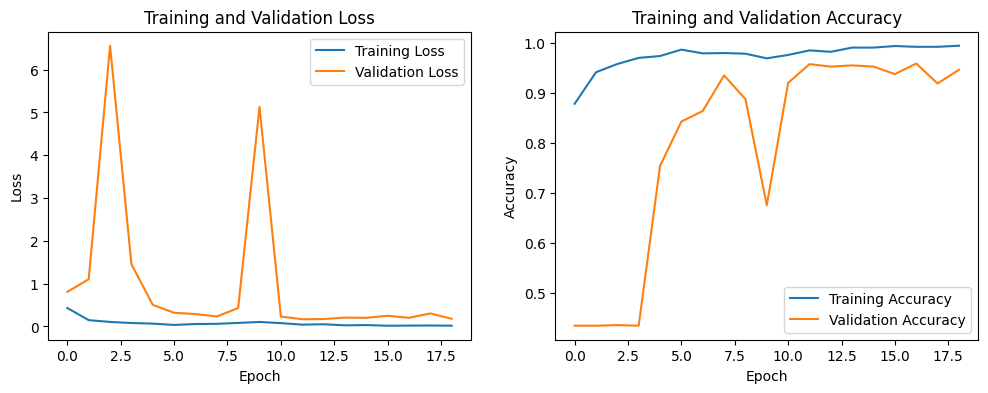

In [ ]:
# ResNet101_ft
plot_training_history(history2)

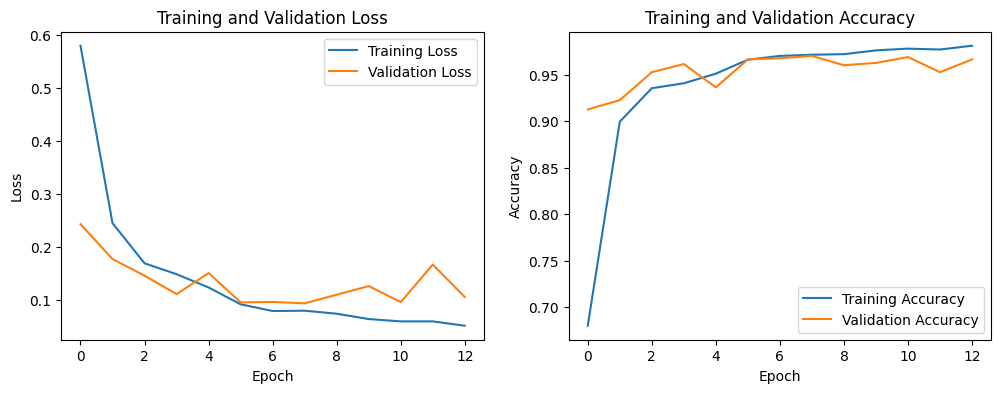

In [ ]:
# VGG16_ft
plot_training_history(history3)

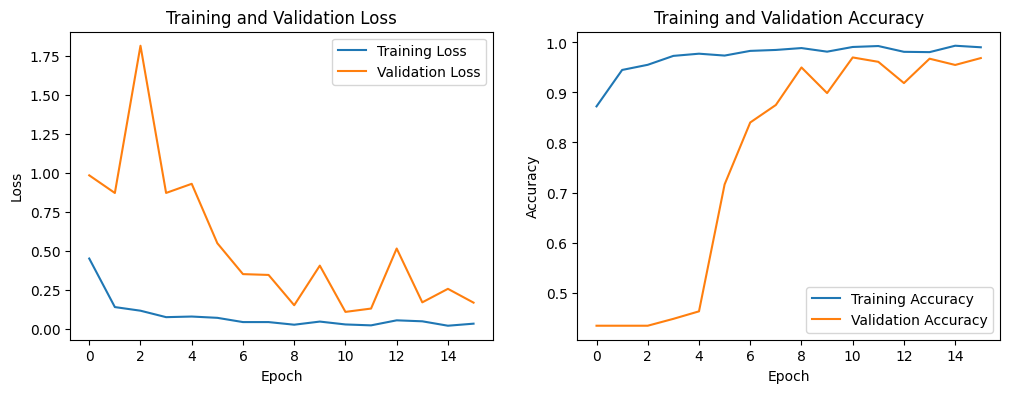

In [ ]:
# ResNet50_ft
plot_training_history(history4)

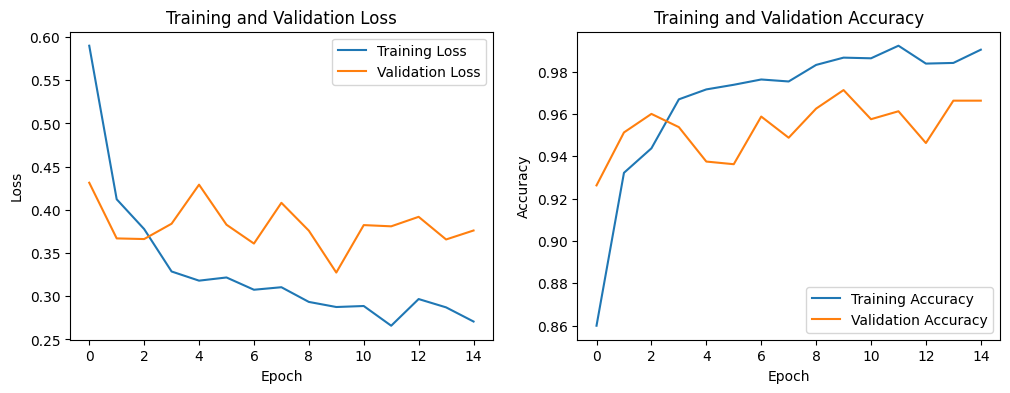

In [ ]:
# GoogleNet_ft
plot_training_history(history5)

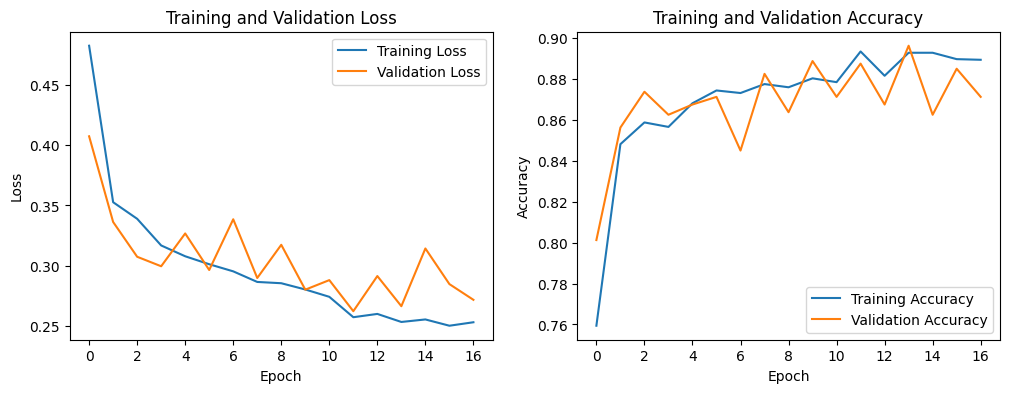

In [ ]:
# VGG19_tl
plot_training_history(history6)

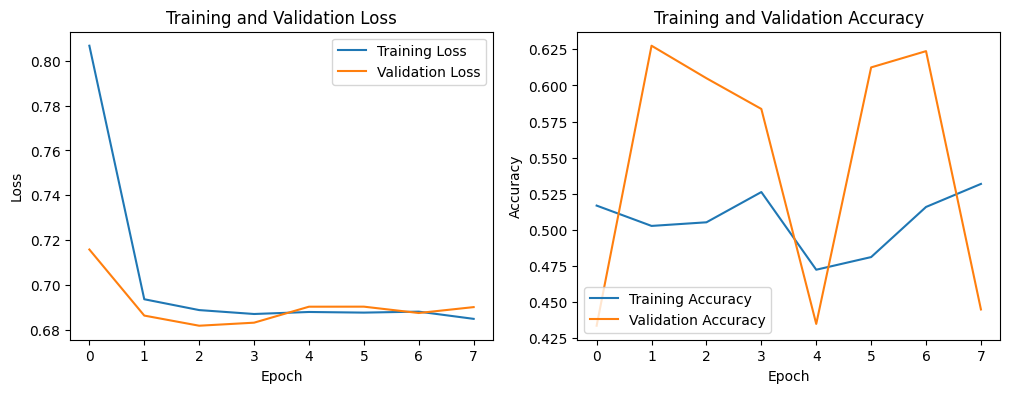

In [ ]:
# ResNet101_f
plot_training_history(history7)

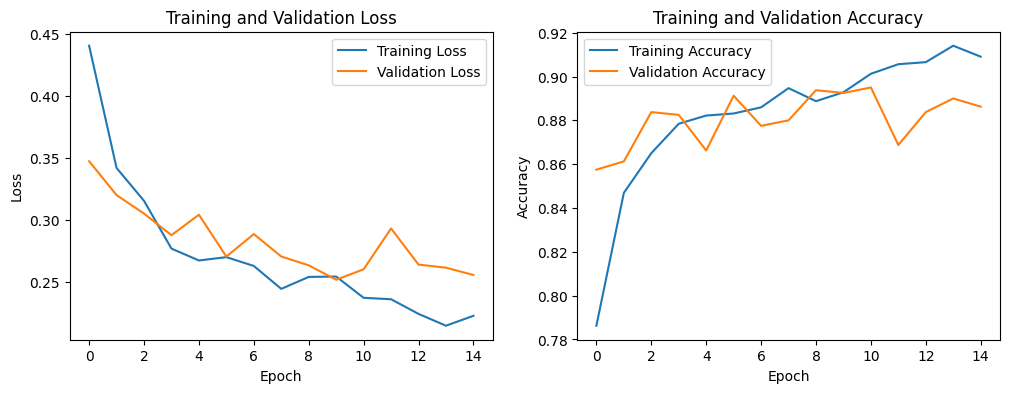

In [ ]:
# VGG16_tl
plot_training_history(history8)

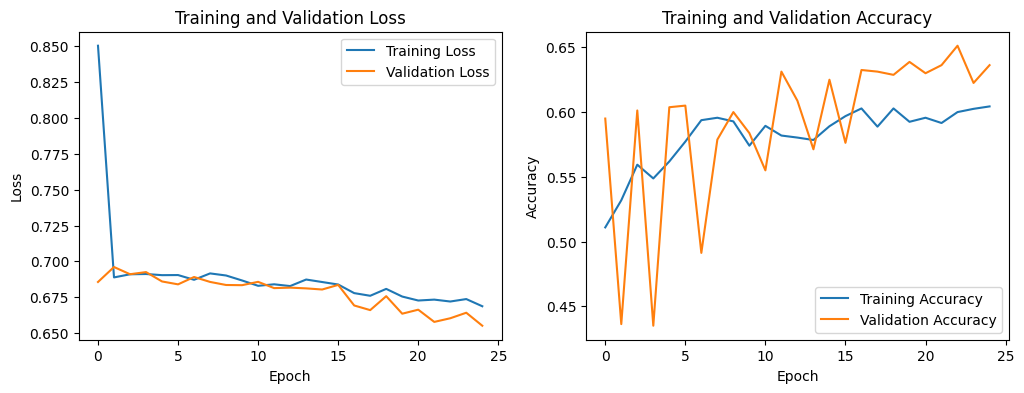

In [ ]:
# ResNet50_tl
plot_training_history(history9)

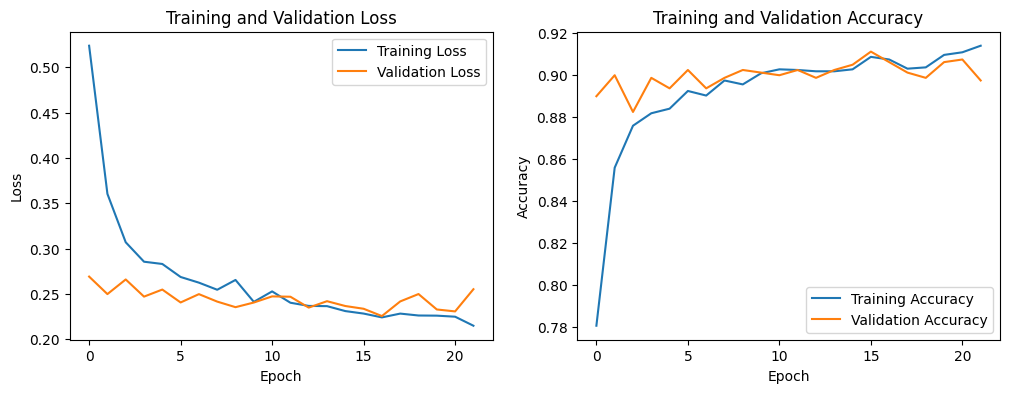

In [ ]:
# GoogleNet_tl
plot_training_history(history10)

# 7. Save The Model

# 8. Model Evalutaion

## 8.2 Model Loading

In [ ]:
save_path = "/content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/new_modelSaver"

In [ ]:
tf.keras.utils.get_custom_objects().update({'CustomInceptionV1LayerFT': CustomInceptionV1LayerFT})

In [ ]:
# Load The model (Fine Tuning)

resnet50_ft = tf.keras.models.load_model(os.path.join(save_path, "resnet50_ft.h5"))
vgg19_ft = tf.keras.models.load_model(os.path.join(save_path, "vgg19_ft.h5"))
vgg16_ft = tf.keras.models.load_model(os.path.join(save_path, "vgg16_ft.h5"))
resnet101_ft = tf.keras.models.load_model(os.path.join(save_path, "resnet101_ft.h5"))
googlenet_ft = tf.keras.models.load_model(os.path.join(save_path, "googlenet_ft.h5"))

In [ ]:
tf.keras.utils.get_custom_objects().update({'CustomInceptionV1LayerTL': CustomInceptionV1LayerTL})

In [ ]:
# Load The model (Transfer Learning)

resnet50_tl = tf.keras.models.load_model(os.path.join(save_path, "ResNet50_tl.h5"))
vgg19_tl = tf.keras.models.load_model(os.path.join(save_path, "vgg19_tl.h5"))
vgg16_tl = tf.keras.models.load_model(os.path.join(save_path, "vgg16_tl.h5"))
resnet101_tl = tf.keras.models.load_model(os.path.join(save_path, "ResNet101_tl.h5"))
googlenet_tl = tf.keras.models.load_model(os.path.join(save_path, "googlenet_tl.h5"))

### 8.3 Model Evaluation With Test Case

In [ ]:
def evaluate_model(model, test_generator):
    # Evaluate the model
    loss, accuracy = model.evaluate(test_generator, verbose=2)
    return accuracy

In [ ]:
# Example of usage for each model
resnet50_ft_accuracy = evaluate_model(resnet50_ft, test_generator)
vgg19_ft_accuracy = evaluate_model(vgg19_ft, test_generator)
vgg16_ft_accuracy = evaluate_model(vgg16_ft, test_generator)
resnet101_ft_accuracy = evaluate_model(resnet101_ft, test_generator)
googlenet_ft_accuracy = evaluate_model(googlenet_ft, test_generator)

# Print the accuracies
print("FINE TUNING :")
print(f'ResNet50 - Accuracy: {100 * resnet50_ft_accuracy:.2f}%')
print(f'VGG19 - Accuracy: {100 * vgg19_ft_accuracy:.2f}%')
print(f'VGG16 - Accuracy: {100 * vgg16_ft_accuracy:.2f}%')
print(f'ResNet101 - Accuracy: {100 * resnet101_ft_accuracy:.2f}%')
print(f'GoogLeNet - Accuracy: {100 * googlenet_ft_accuracy:.2f}%') # Not permanent, cause model can't be loaded

32/32 - 13s - loss: 0.1316 - accuracy: 0.9660 - 13s/epoch - 421ms/step
32/32 - 12s - loss: 0.0918 - accuracy: 0.9690 - 12s/epoch - 380ms/step
32/32 - 12s - loss: 0.1105 - accuracy: 0.9610 - 12s/epoch - 364ms/step
32/32 - 12s - loss: 0.1098 - accuracy: 0.9700 - 12s/epoch - 375ms/step
32/32 - 14s - loss: 0.3391 - accuracy: 0.9700 - 14s/epoch - 445ms/step
FINE TUNING :
ResNet50 - Accuracy: 96.60%
VGG19 - Accuracy: 96.90%
VGG16 - Accuracy: 96.10%
ResNet101 - Accuracy: 97.00%
GoogLeNet - Accuracy: 97.00%


In [ ]:
# Example of usage for each model
resnet50_tl_accuracy = evaluate_model(resnet50_tl, test_generator)
vgg19_tl_accuracy = evaluate_model(vgg19_tl, test_generator)
vgg16_tl_accuracy = evaluate_model(vgg16_tl, test_generator)
resnet101_tl_accuracy = evaluate_model(resnet101_tl, test_generator)
googlenet_tl_accuracy = evaluate_model(googlenet_tl, test_generator)

# Print the accuracies
print("Transfer Learning:")
print(f'ResNet50 - Accuracy: {100 * resnet50_tl_accuracy:.2f}%')
print(f'VGG19 - Accuracy: {100 * vgg19_tl_accuracy:.2f}%')
print(f'VGG16 - Accuracy: {100 * vgg16_tl_accuracy:.2f}%')
print(f'ResNet101 - Accuracy: {100 * resnet101_tl_accuracy:.2f}%')
print(f'GoogLeNet - Accuracy: {100 * googlenet_tl_accuracy:.2f}%') # Not permanent, cause model can't be loaded

32/32 - 14s - loss: 0.6678 - accuracy: 0.6180 - 14s/epoch - 449ms/step
32/32 - 17s - loss: 0.2623 - accuracy: 0.8930 - 17s/epoch - 538ms/step
32/32 - 15s - loss: 0.2375 - accuracy: 0.9060 - 15s/epoch - 474ms/step
32/32 - 13s - loss: 0.6868 - accuracy: 0.6240 - 13s/epoch - 392ms/step
32/32 - 12s - loss: 0.4549 - accuracy: 0.9210 - 12s/epoch - 384ms/step
Transfer Learning:
ResNet50 - Accuracy: 61.80%
VGG19 - Accuracy: 89.30%
VGG16 - Accuracy: 90.60%
ResNet101 - Accuracy: 62.40%
GoogLeNet - Accuracy: 92.10%


## 8.4 Accuracy Plotting

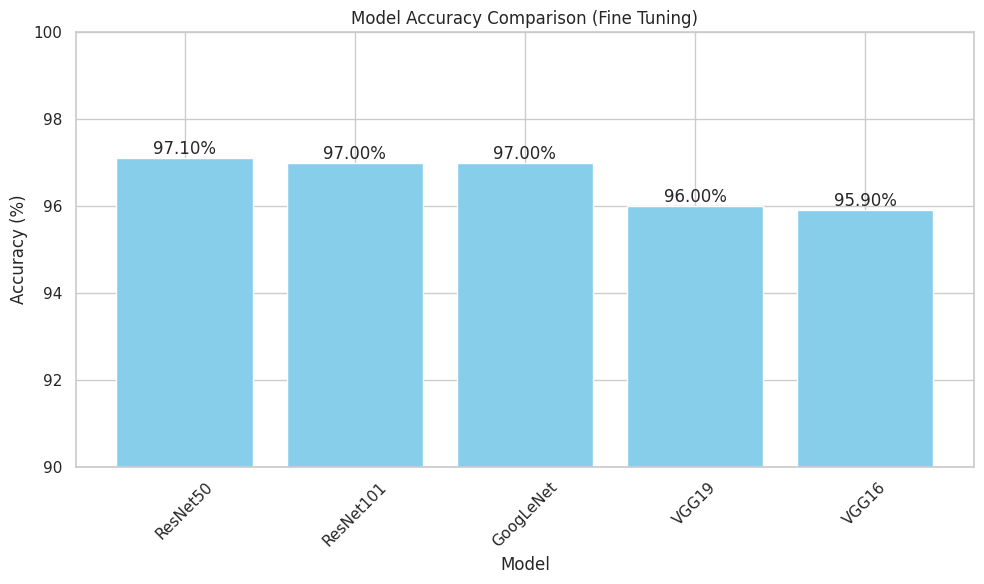

In [ ]:
import matplotlib.pyplot as plt

# Store the accuracies in a dictionary
accuracies = {
    "ResNet50": resnet50_ft_accuracy,
    "VGG19": vgg19_ft_accuracy,
    "VGG16": vgg16_ft_accuracy,
    "ResNet101": resnet101_ft_accuracy,
    "GoogLeNet": googlenet_ft_accuracy
}

# Sort the models by accuracy in descending order
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Extract model names and accuracies for plotting
model_names = list(sorted_accuracies.keys())
model_accuracies = list(sorted_accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, [100 * acc for acc in model_accuracies], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Fine Tuning)')
plt.ylim(90, 100)  # Set the y-axis limit to emphasize the differences
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate the accuracy values on top of the bars
for i, acc in enumerate(model_accuracies):
    plt.text(i, 100 * acc, f'{100 * acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


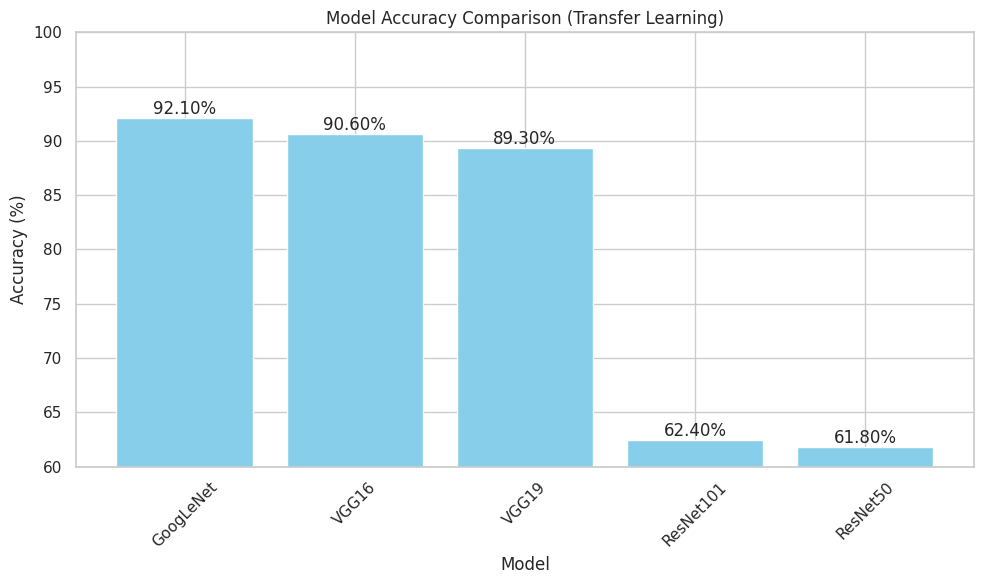

In [ ]:
import matplotlib.pyplot as plt

# Store the accuracies in a dictionary
accuracies = {
    "ResNet50": resnet50_tl_accuracy,
    "VGG19": vgg19_tl_accuracy,
    "VGG16": vgg16_tl_accuracy,
    "ResNet101": resnet101_tl_accuracy,
    "GoogLeNet": googlenet_tl_accuracy
}

# Sort the models by accuracy in descending order
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Extract model names and accuracies for plotting
model_names = list(sorted_accuracies.keys())
model_accuracies = list(sorted_accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, [100 * acc for acc in model_accuracies], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Transfer Learning)')
plt.ylim(60, 100)  # Set the y-axis limit to start from 60 and go up to 100
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate the accuracy values on top of the bars
for i, acc in enumerate(model_accuracies):
    plt.text(i, 100 * acc, f'{100 * acc:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()